In [ ]:
# Irina Kalmykova
# Getting to know the data 
# For the purposes of this assignment, I have chosen Jupyter since it allowed for most flexibility and customization of possible visualizations. 
# I hope that would satisfy you requirements. To make it work, I also wrote some custom functions, which are saved in the "help_functions.py" file. 
# I will upload both files to my GitHub repository in case you have any questions about my source code. 
# The repository is available at: https://github.com/i-kalm/suncharge_data_analysis

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import calendar
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

import help_functions
dataframe_obj = help_functions.Dataframes()
histogram_obj = help_functions.Histograms()
clusterer_obj = help_functions.Clusterer()
pca_obj       = help_functions.CustomPCA()
correlations_obj = help_functions.Correlations()

In [2]:
# read in data
data_directory = "C:\\Users\\irina\\Documents\\UH\\Vizualization in Data Science DL\\suncharge\\data"
files = os.listdir(data_directory)
dataframes = {}

# Loop through each file in the data directory
for filename in os.listdir(data_directory):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(data_directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Remove the '.csv' from filename and use it as the key in the dictionary
        key_name = filename[:-4]
        # Store the DataFrame in the dictionary
        dataframes[key_name] = df

In [3]:
# Summarize the contents of the Bill of Materials (BOM) dataset. 
dataframe_obj.print_summary(dataframes, 'BOM')

Shape of BOM: (42, 4)
Data Types in BOM:
Material            object
Component           object
Product Category    object
Finished Product    object
dtype: object

Number of Unique Values in Each Column:
Material: 33 unique values
Component: 16 unique values
Product Category: 12 unique values
Finished Product: 2 unique values

Summary Statistics for Numerical Columns in BOM
       Material                    Component Product Category Finished Product
count        42                           40               42               42
unique       33                           16               12                2
top       W-001  Other Electrical Components    Miscellaneous   EV Car Battery
freq          2                            6               15               25

First 2 rows of BOM
   Material      Component     Product Category Finished Product
0  EVCB-001            NaN  EV Car Battery - FP   EV Car Battery
1    BC-001  Battery Cells        Battery Cells   EV Car Battery


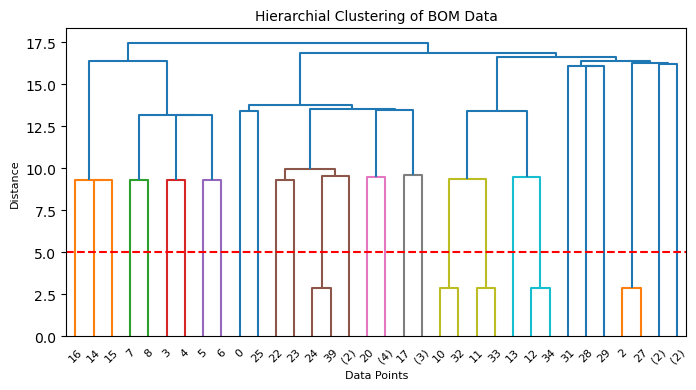

In [4]:
# Perform and plot a hierarchical clustering analysis on the BOM data to identify inherent groupings.

clusterer_obj.plot_hierarchical_clustering(dataframes['BOM'], figsize=(8, 4), max_d=5, sample_frac=1, title = "Hierarchial Clustering of BOM Data")

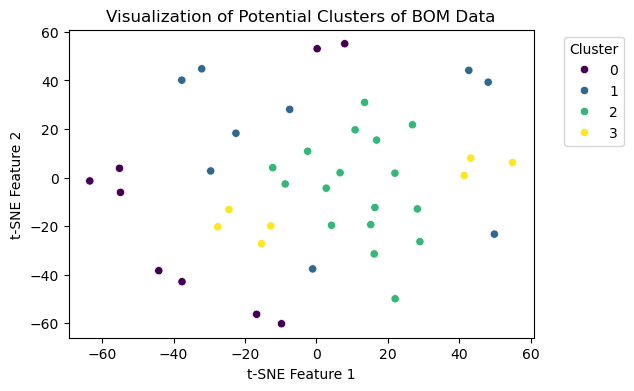

In [5]:
# The hierarchical clustering analysis of the Bill of Materials (BOM) data suggests that dividing the data into distinct clusters 
# could challenging since these clusters are likely to have overlapping characteristics or similarities across the groups.
# To vizualize this, I will try splitting the dataset into 4 clusters.

clusterer_obj.visualize_clusters(dataframes['BOM'], n_clusters=4, figsize=(6, 4), sample_frac=1, title = "Visualization of Potential Clusters of BOM Data")

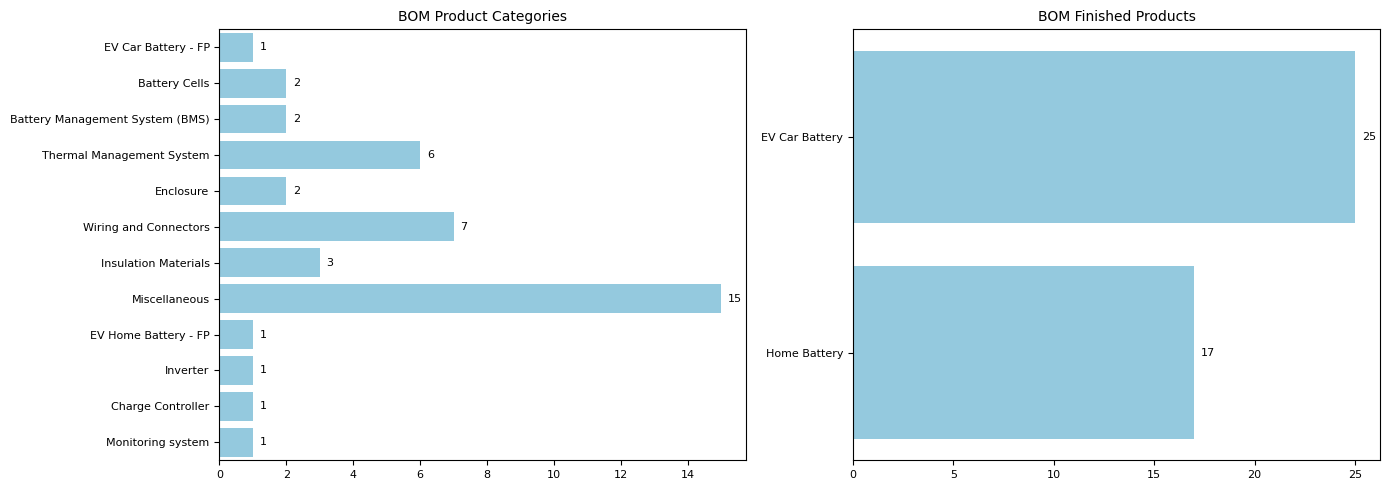

In [6]:
# Demonstrate the distribution and frequency for 'Product Category' and 'Finished Product' values within the BOM dataset.

fig, axs = plt.subplots(1, 2, figsize=(14, 5)) 
histogram_obj.plot_horizontal(axs[0], dataframes['BOM'], 'Product Category', title='BOM Product Categories')
histogram_obj.plot_horizontal(axs[1], dataframes['BOM'], 'Finished Product', title='BOM Finished Products')
plt.tight_layout()  
plt.show()

In [7]:
# Explore the CustomerPlantRelation dataset by summarizing its contents and identifying key characteristics. 

dataframe_obj.print_summary(dataframes, 'CustomerPlantRelation')

Shape of CustomerPlantRelation: (22, 2)
Data Types in CustomerPlantRelation:
CustomerCountry    object
PlantKey            int64
dtype: object

Number of Unique Values in Each Column:
CustomerCountry: 22 unique values
PlantKey: 5 unique values

Summary Statistics for Numerical Columns in CustomerPlantRelation
        PlantKey
count  22.000000
mean    6.227273
std     1.445249
min     4.000000
25%     5.000000
50%     6.000000
75%     8.000000
max     8.000000

First 2 rows of CustomerPlantRelation
  CustomerCountry  PlantKey
0         Belgium         4
1         Croatia         6


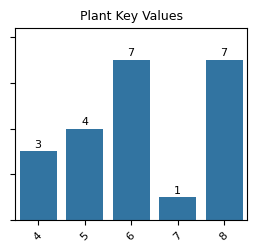

In [8]:
# Examine the distribution of 'PlantKey' column values within the CustomerPlantRelation.

histogram_obj.plot_vertical(dataframes['CustomerPlantRelation'], 'PlantKey', title="Plant Key Values")

In [9]:
# Here, I will skip PCA and cluster analysis because I do not think they could be of relevance for this small mapping table.

In [10]:
# Summarize the 'Customers' dataset.

dataframe_obj.print_summary(dataframes, 'Customers')

Shape of Customers: (1227, 7)
Data Types in Customers:
CustomerKey            int64
CustomerName          object
CustomerCountry       object
CustomerCity          object
CustomerPostalCode    object
CustomerStreet        object
PlantKey               int64
dtype: object

Number of Unique Values in Each Column:
CustomerKey: 1227 unique values
CustomerName: 1227 unique values
CustomerCountry: 22 unique values
CustomerCity: 705 unique values
CustomerPostalCode: 774 unique values
CustomerStreet: 1226 unique values
PlantKey: 5 unique values

Summary Statistics for Numerical Columns in Customers
       CustomerKey     PlantKey
count  1227.000000  1227.000000
mean    614.000000     5.341483
std     354.348698     1.450634
min       1.000000     4.000000
25%     307.500000     4.000000
50%     614.000000     5.000000
75%     920.500000     6.000000
max    1227.000000     8.000000

First 2 rows of Customers
   CustomerKey                CustomerName CustomerCountry CustomerCity  \
0           

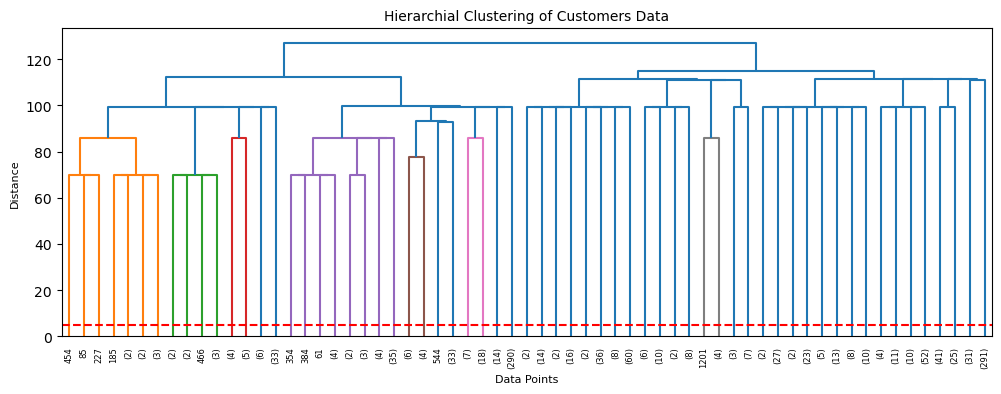

In [11]:
# Conduct and visualize hierarchical clustering on the Customers dataset to explore underlying patterns or groupings among the customer data.

clusterer_obj.plot_hierarchical_clustering(dataframes['Customers'], figsize=(12, 4), max_d=5, sample_frac=1, title = "Hierarchial Clustering of Customers Data")

# Conclusion: Clustering this dataset could be challenging, since these clusters are likely to have a lot similarities.

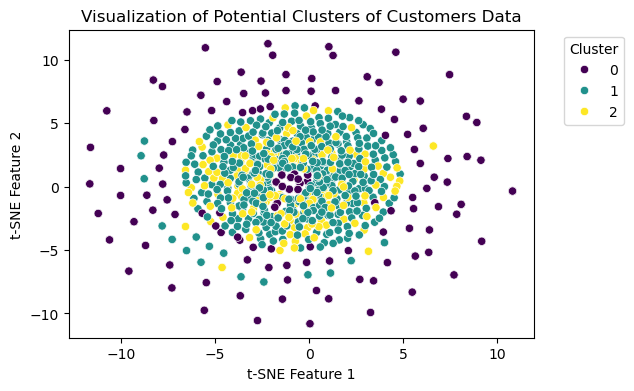

In [12]:
# To vizualize the challenges of clustering the 'Customers' data, I will try splitting the dataset into 3 clusters. 
# I will cluster a subset of data, since the whole dataset is quite large and grouping it into clusters would take significant computational capacity.

clusterer_obj.visualize_clusters(dataframes['Customers'], n_clusters=3, figsize=(6, 4), sample_frac=0.85, title  =  "Visualization of Potential Clusters of Customers Data")

In [13]:
# I will try executing  Principal Component Analysis (PCA) on the 'Customers' dataset trying to reduce the 
# number of components to four. Looking at the total variance these four components account for, less than 1 percent, I 
# will opt not to plot the component loadings. PCA is unlikely to effectively reduce the dimentionality of this data set.

pca_obj.perform_pca(data = dataframes['Customers'], n_components=4, plot_loadings=False, plot_title = 'PCA Component Loadings of Customers Data')

'Explained variance ratio: [0.00171875 0.00123602 0.00118655 0.00118285], Total variance explained by the first 4 components: 0.01 or 0.53%'

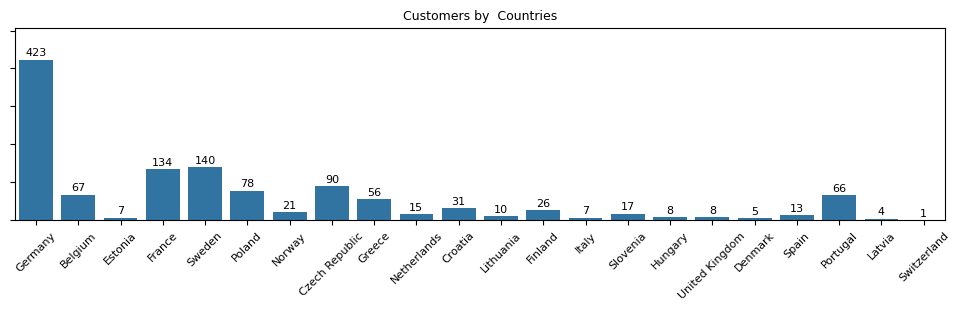

In [14]:
# Investigate the geographic distribution of customers and the number of customers per plant 
# by examining 'CustomerCountry' and 'PlantKey' value distributions. 

histogram_obj.plot_vertical(dataframes['Customers'], 'CustomerCountry', title='Customers by  Countries', figsize=(12, 2.5),)

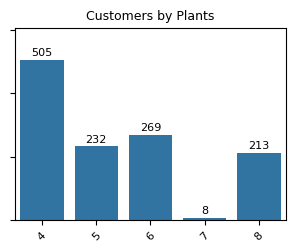

In [15]:
histogram_obj.plot_vertical(dataframes['Customers'], 'PlantKey', title='Customers by Plants', figsize=(3.5, 2.5),)

In [16]:
# Provide an overview of the 'Forecast' dataset.
dataframe_obj.print_summary(dataframes, 'Forecast')

Shape of Forecast: (480, 5)
Data Types in Forecast:
RequestedDeliveryMonth    object
MaterialKey                int64
PlantKey                   int64
Quantity                   int64
MaterialPlantKey           int64
dtype: object

Number of Unique Values in Each Column:
RequestedDeliveryMonth: 48 unique values
MaterialKey: 2 unique values
PlantKey: 5 unique values
Quantity: 459 unique values
MaterialPlantKey: 10 unique values

Summary Statistics for Numerical Columns in Forecast
       MaterialKey    PlantKey      Quantity  MaterialPlantKey
count   480.000000  480.000000    480.000000        480.000000
mean      1.500000    6.000000   5241.481250      15006.000000
std       0.500522    1.415689   5272.491561       5005.216686
min       1.000000    4.000000      9.000000      10004.000000
25%       1.000000    5.000000   1608.500000      10006.000000
50%       1.500000    6.000000   3142.500000      15006.000000
75%       2.000000    7.000000   7962.000000      20006.000000
max       2

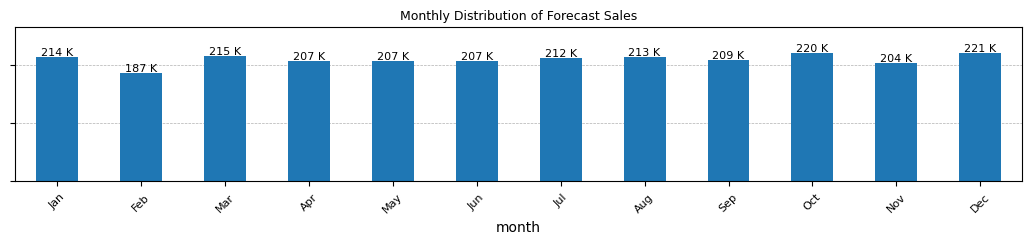

In [17]:
# Analyze the monthly distribution of forecasted quantities, correlating them with the number of days in a month to identify seasonal patterns 
# or anomalies.
# Conclusion: the Quantity seems to be correlated with the number of days in a month.

histogram_obj.plot_monthly_quantity_distribution(dataframes['Forecast'], date_column = 'RequestedDeliveryMonth', quantity_column ='Quantity',\
                                                 figsize=(13, 2), value_format='{:.0f} K', title = "Monthly Distribution of Forecast Sales")

In [18]:
# Summarize the 'Inventory' dataset.

dataframe_obj.print_summary(dataframes, 'Inventory')

Shape of Inventory: (260, 7)
Data Types in Inventory:
MaterialKey                   int64
PlantKey                      int64
MaterialPlantKey              int64
SnapshotDate                 object
GrossInventoryQuantity      float64
OnShelfInventoryQuantity      int64
InTransitQuantity           float64
dtype: object

Number of Unique Values in Each Column:
MaterialKey: 2 unique values
PlantKey: 5 unique values
MaterialPlantKey: 10 unique values
SnapshotDate: 26 unique values
GrossInventoryQuantity: 248 unique values
OnShelfInventoryQuantity: 217 unique values
InTransitQuantity: 256 unique values

Summary Statistics for Numerical Columns in Inventory
       MaterialKey    PlantKey  MaterialPlantKey  GrossInventoryQuantity  \
count   260.000000  260.000000        260.000000              260.000000   
mean      1.500000    6.000000      15006.000000              578.694361   
std       0.500964    1.416941       5009.643411              582.695253   
min       1.000000    4.000000      

In [19]:
# Explore the frequency of snapshot dates in the 'Inventory' dataset to understand the cadence and rationale behind inventory snapshots.
# Conslusion: Snapshots are taken at the end of every month.

print(dataframes['Inventory']['SnapshotDate'].value_counts())

SnapshotDate
2021-12-31    10
2022-01-31    10
2023-12-31    10
2023-11-30    10
2023-10-31    10
2023-09-30    10
2023-08-31    10
2023-07-31    10
2023-06-30    10
2023-05-31    10
2023-04-30    10
2023-03-31    10
2023-02-28    10
2023-01-31    10
2022-12-31    10
2022-11-30    10
2022-10-31    10
2022-09-30    10
2022-08-31    10
2022-07-31    10
2022-06-30    10
2022-05-31    10
2022-04-30    10
2022-03-31    10
2022-02-28    10
2024-01-31    10
Name: count, dtype: int64


In [20]:
# Enhance the 'Inventory' dataset with 'Year' and 'Month' columns derived from 'SnapshotDate' to facilitate seasonal pattern analysis.

dataframes['Inventory']['SnapshotDate'] = pd.to_datetime(dataframes['Inventory']['SnapshotDate'])
dataframes['Inventory']['Year'] = dataframes['Inventory']['SnapshotDate'].dt.year
dataframes['Inventory']['Month'] = dataframes['Inventory']['SnapshotDate'].dt.month

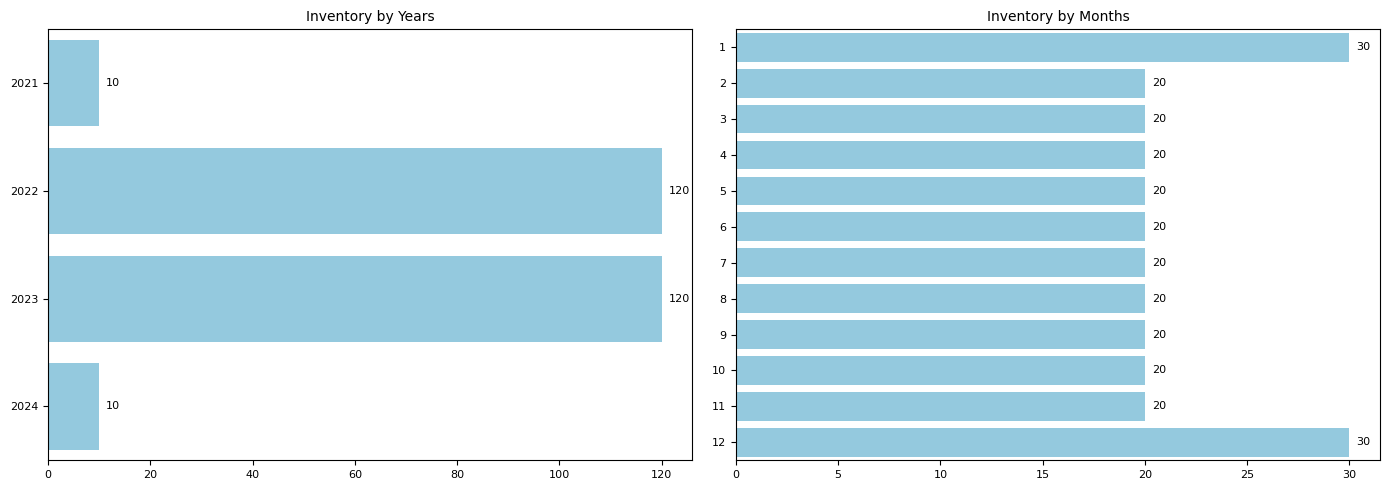

In [21]:
# Plot inventory levels across different years and months, aiming to uncover temporal trends or fluctuations.
# Conclusion: the inventory information covers 2023 and 2023 in full and parts of 2021 and 2024.

fig, axs = plt.subplots(1, 2, figsize=(14, 5))  
histogram_obj.plot_horizontal(axs[0], dataframes['Inventory'], 'Year', title='Inventory by Years')
histogram_obj.plot_horizontal(axs[1], dataframes['Inventory'], 'Month', title='Inventory by Months')
plt.tight_layout()  
plt.show()

In [22]:
# Prepare and analyze data for a polar plot visualization, comparing 'GrossInventoryQuantity' and 'InTransitQuantity' across different periods.

monthly_inventory = dataframes['Inventory'].groupby(['Year', 'Month'])['GrossInventoryQuantity'].sum().unstack(0)
years = sorted(dataframes['Inventory']['Year'].unique())
monthly_inventory_in_transit = dataframes['Inventory'].groupby(['Year', 'Month'])['InTransitQuantity'].sum().unstack(0)

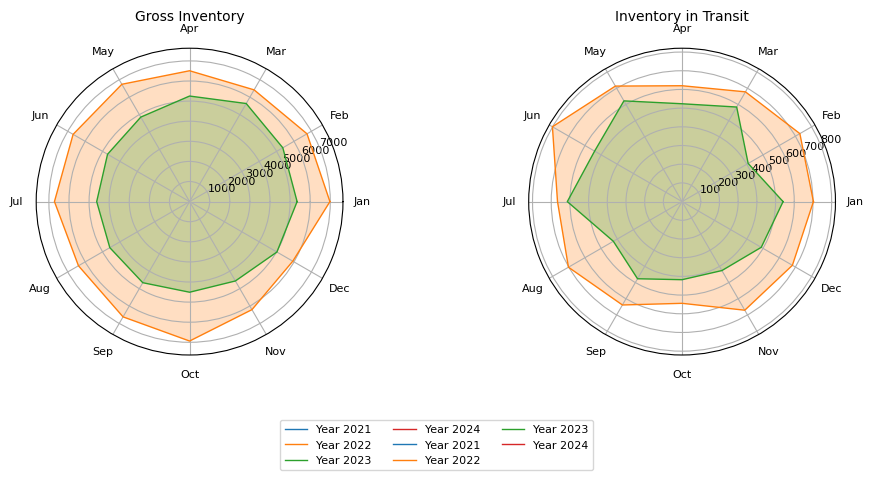

In [23]:
# Provide polar plot visualizations of 'GrossInventoryQuantity' and 'InTransitQuantity' data across different periods.

# Conclusion based on the analysis of the visualizations: 
# The dataset primarily spans the years 2022 and 2023. A notable observation is the significant reduction in overall inventory levels in 2023 
# compared to the previous year. Specifically, the period from December to April in 2023 exhibited higher inventory levels relative to the period 
# from April to December. This seasonal pattern suggests fluctuations in inventory management practices or demand cycles within the observed timeframe.
# Contrastingly, the dynamics of Inventory in Transit present a distinct pattern. Despite a general decline in total inventory volumes 
# in 2023 — mirroring the trend observed in Gross Inventory — the data indicate higher levels of Inventory in Transit during the summer and spring months
# compared to autumn and winter. This divergence underscores a possible variation in logistical operations or supply chain efficiency 
# during different seasons, warranting further investigation to elucidate the underlying factors contributing to these seasonal discrepancies.
    
histogram_obj.polar_plot(df1 = dataframes['Inventory'], df1_quantity_column = 'GrossInventoryQuantity',\
                         df2 =  dataframes['Inventory'], df2_quantity_column = 'InTransitQuantity',\
                         plot1_title="Gross Inventory", plot2_title="Inventory in Transit")

In [24]:
# Summarize the 'MaterialPlantRelation' dataset.

dataframe_obj.print_summary(dataframes, 'MaterialPlantRelation')

Shape of MaterialPlantRelation: (109, 11)
Data Types in MaterialPlantRelation:
MaterialKey                    int64
PlantKey                       int64
MaterialPlantKey               int64
VendorKey                      int64
StandardCost                 float64
Currency                      object
ProductionTime                 int64
InboundTransportationTime      int64
GoodReceiptProcessingTime      int64
TotalInboundLeadTime           int64
SafetyStockQty               float64
dtype: object

Number of Unique Values in Each Column:
MaterialKey: 33 unique values
PlantKey: 8 unique values
MaterialPlantKey: 109 unique values
VendorKey: 9 unique values
StandardCost: 10 unique values
Currency: 4 unique values
ProductionTime: 17 unique values
InboundTransportationTime: 12 unique values
GoodReceiptProcessingTime: 1 unique values
TotalInboundLeadTime: 33 unique values
SafetyStockQty: 9 unique values

Summary Statistics for Numerical Columns in MaterialPlantRelation
       MaterialKey    Pla

In [25]:
# Convert 'StandardCost' to euros for the 'MaterialPlantRelation' dataset to standardize cost data across different currencies for comparative analysis.

print(dataframes['MaterialPlantRelation']['Currency'].value_counts())

Currency
EUR    70
PLN    35
GBP     2
SEK     2
Name: count, dtype: int64


In [26]:
# To simplify financial comparisons, all prices in the dataset are converted to euros using fixed exchange rates for PLN, EUR, GBP, and SEK. 
# This approach assumes static exchange rates to ensure consistency across the data:

exchange_rates = {
    'PLN': 0.23,  # Example rate: 1 USD = 0.93 EUR
    'EUR': 1,     # No conversion needed for EUR
    'GBP': 1.17,  # Example rate: 1 GBP = 1.17 EUR
    'SEK': 0.0089 # Example rate: 1 JPY = 0.0074 EUR
}

# Convert prices to euros
dataframes['MaterialPlantRelation']['EurStandardCost'] = dataframes['MaterialPlantRelation'].apply(lambda row: row['StandardCost'] * exchange_rates[row['Currency']], axis=1)

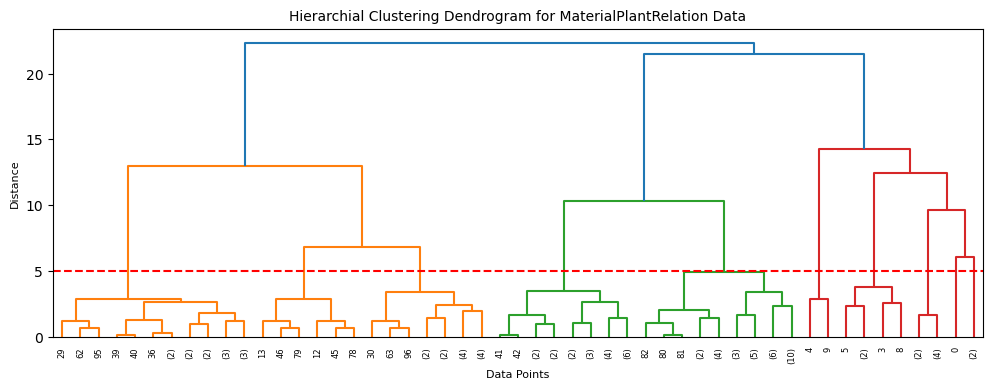

In [27]:
# Remove 'Currency' and 'StandardCost' columns from 'MaterialPlantRelation' to focus on other attributes for clustering.
# This step simplifies the dataset by excluding direct financial metrics, allowing the clustering algorithm to identify patterns 
# based on operational or material-specific characteristics.

mpr = dataframes['MaterialPlantRelation'].drop(['Currency', 'StandardCost'], axis=1)

# Plot hierarchical clustering for the simplified 'MaterialPlantRelation' dataframe. 

clusterer_obj.plot_hierarchical_clustering(mpr, figsize=(12, 4), max_d=5, sample_frac=1, title = "Hierarchial Clustering Dendrogram for MaterialPlantRelation Data")

# Conclusion: the MaterialPlantRelation dataset can be split into a few groups which are quite distinct from each other 

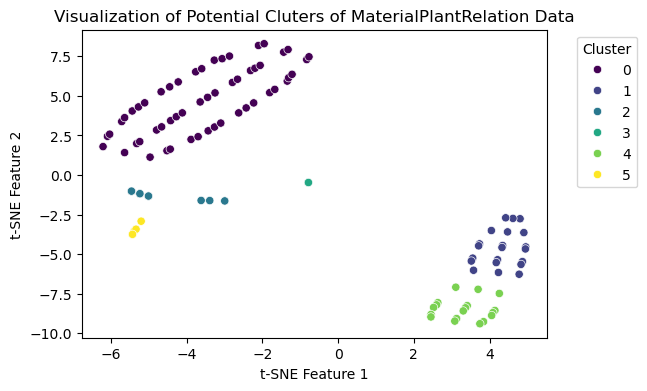

In [28]:
# Conduct and visualize clustering on the 'MaterialPlantRelation' dataset to explore underlying patterns 

clusterer_obj.visualize_clusters(mpr, n_clusters=6, figsize=(6, 4), sample_frac=1, title = "Visualization of Potential Cluters of MaterialPlantRelation Data")

In [29]:
# After a Principal Component Analysis (PCA) on the 'MaterialPlantRelation' dataset conducted with the aim of reducing the dataset to a few features, 
# the results indicate that five possible components collectively account for no more than 27% of the total variance. 
# Given the relatively low proportion of explained variance, utilizing PCA for dimensionality reduction in this case does not seem 
# to offer substantial benefits. Consequently, I have decided against employing PCA as a strategy for simplifying the dataset, and thus, 
# will not present a plot of the PCA results here.

pca_obj.perform_pca(data = mpr, n_components=5, plot_loadings=False, categorical_cols=['MaterialKey', 'PlantKey', 'VendorKey'], ignore_cols=['MaterialPlantKey'])

'Explained variance ratio: [0.08443064 0.05904272 0.04566551 0.04236249 0.04135334], Total variance explained by the first 5 components: 0.27 or 27.29%'

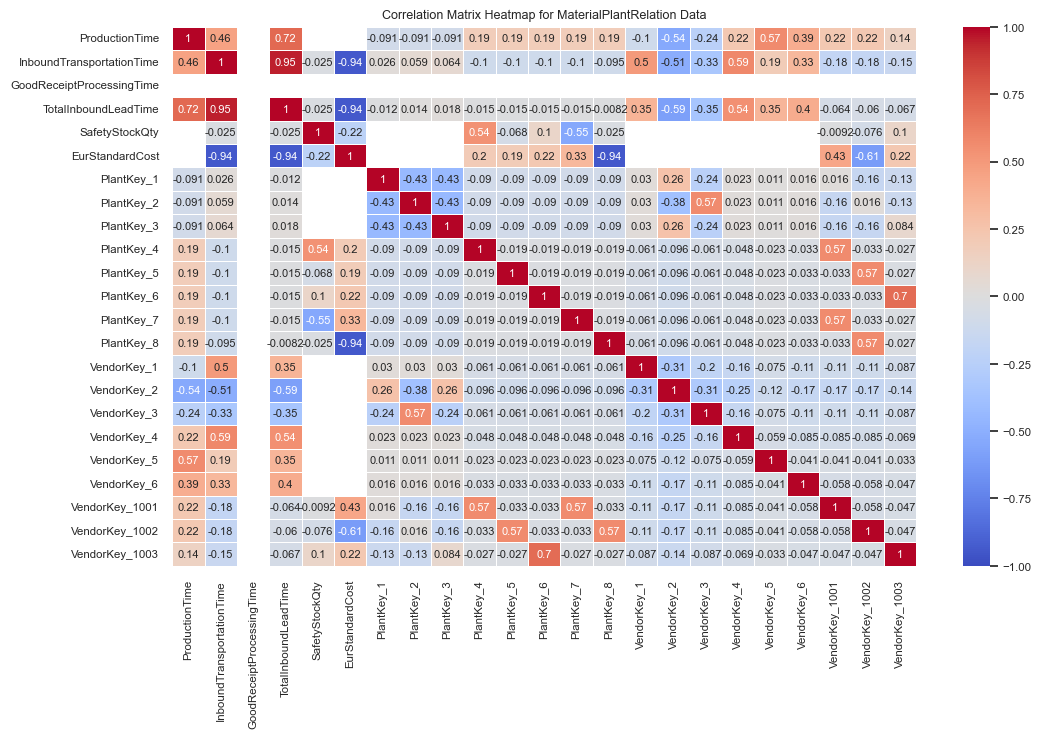

In [30]:
# Perform the correlation analysis and plot the correlation matrix for an simplified version of the 'MaterialPlantRelation' dataset
# containing no datetime columns

# In this analysis, several notable correlations emerge from the dataset. Firstly, a positive correlation is observed between ProductionTime
# and TotalInboundLeadTime, suggesting a direct relationship between the production time and the total time materials spend in inbound logistics.

# Conversely, a negative correlation is identified between InboundTransportationTime and EurStandardCost, as well as between 
#TotalInboundLeadTime and EurStandardCost. These negative correlations imply that as the time associated with inbound transportation 
# and the total inbound lead time increase, the standardized cost in euros tends to decrease, 
# potentially hinting at possible efficiencies or cost-saving strategies in longer logistics processes.

# Additionally, the analysis reveals correlations between specific plants and vendors, indicating that certain vendors 
# are more frequently associated with specific plants. This could reflect specialized supply chain relationships
# or procurement strategies tailored to the operational needs of particular plants.

# Additionally, there is a negative correlation between EurStandardCost and PlantKey_8. 
# This suggests that materials or products associated with PlantKey_8 tend to have lower standardized costs in euros compared to those 
# associated with other plants, possibly indicating cost efficiencies or different pricing strategies at this specific plant."

correlations_obj.plot_correlation_matrix(mpr, categorical_cols=['PlantKey','VendorKey'], encode_categorical=True, ignore_cols=['MaterialPlantKey', 'MaterialKey'],\
                                        plot_title = 'Correlation Matrix Heatmap for MaterialPlantRelation Data')

In [31]:
# Summarize the 'Materials' dataset.
dataframe_obj.print_summary(dataframes, 'Materials')

Shape of Materials: (33, 6)
Data Types in Materials:
Material               object
MaterialKey             int64
MaterialType           object
MaterialDescription    object
Product Category       object
Component              object
dtype: object

Number of Unique Values in Each Column:
Material: 33 unique values
MaterialKey: 33 unique values
MaterialType: 2 unique values
MaterialDescription: 33 unique values
Product Category: 12 unique values
Component: 16 unique values

Summary Statistics for Numerical Columns in Materials
       MaterialKey
count     33.00000
mean      17.00000
std        9.66954
min        1.00000
25%        9.00000
50%       17.00000
75%       25.00000
max       33.00000

First 2 rows of Materials
   Material  MaterialKey      MaterialType MaterialDescription  \
0  EVCB-001            1  Finished Product      EV Car Battery   
1    HB-001            2  Finished Product        Home Battery   

       Product Category Component  
0   EV Car Battery - FP       NaN  


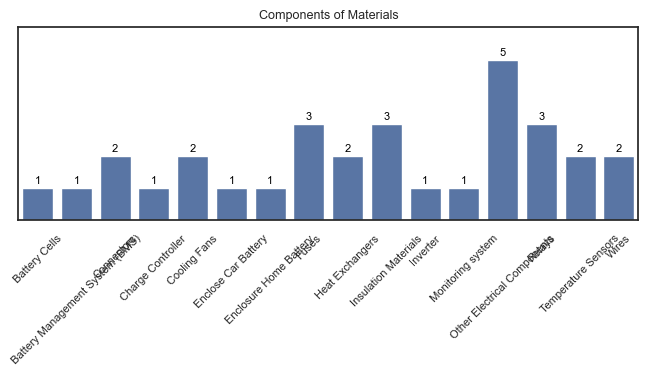

In [32]:
# Analyze the distribution of Components of Materials. 

histogram_obj.plot_vertical(dataframes['Materials'], 'Component', title='Components of Materials', figsize=(8, 2.5),)

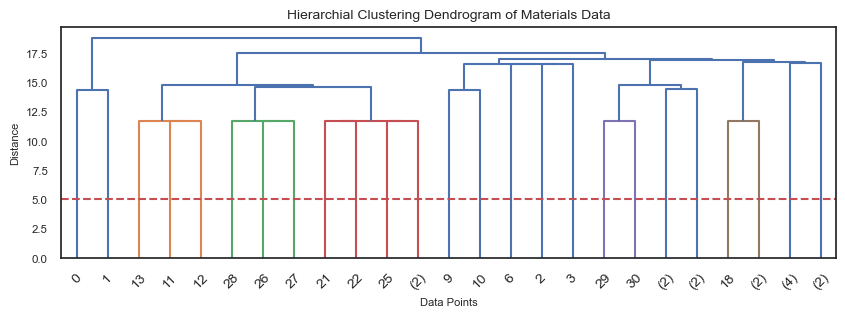

In [33]:
# Perform and plot a hierarchical clustering analysis on the 'Materials' data. 

clusterer_obj.plot_hierarchical_clustering(dataframes['Materials'], figsize=(10, 3), max_d=5, sample_frac=1, title = "Hierarchial Clustering Dendrogram of Materials Data")

# Conclusion: based on the results of hierarchial clustering analysis, clustering could be not the best approach to working with this data. 

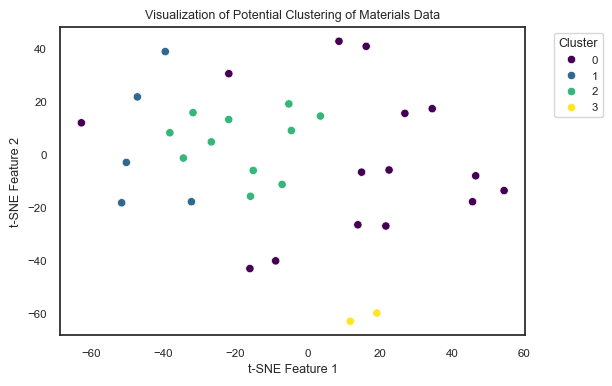

In [34]:
# The hierarchical clustering analysis indicates that possible clusters are not markedly distinct from each other, 
# implying overlapping characteristics or similarities across the groups. This can be visualized as below:

clusterer_obj.visualize_clusters(dataframes['Materials'], n_clusters=4, figsize=(6, 4), sample_frac=1, title = "Visualization of Potential Clustering of Materials Data")

# Conclusion: clustering seems not to be a good approach on this dataset

In [35]:
# Execute Principal Component Analysis (PCA) on the 'Materias' dataset with four components, opting not to plot the component loadings. 

# Preliminary analysis indicates a low degree of correlation among the original features in the dataframe, 
# making it a not good candidate for dimensionality reduction. Specifically, the Principal Component Analysis (PCA) 
# suggests that a reduced set of four components can account for no more than 20% of the variance.

pca_obj.perform_pca(data = dataframes['Materials'], n_components=4, plot_loadings=False, categorical_cols = ['MaterialKey', 'MaterialType', 'Product Category', 'Component'],\
                    ignore_cols = ['Material', 'MaterialDescription'])

'Explained variance ratio: [0.0658201  0.05574023 0.0520622  0.05130619], Total variance explained by the first 4 components: 0.22 or 22.49%'

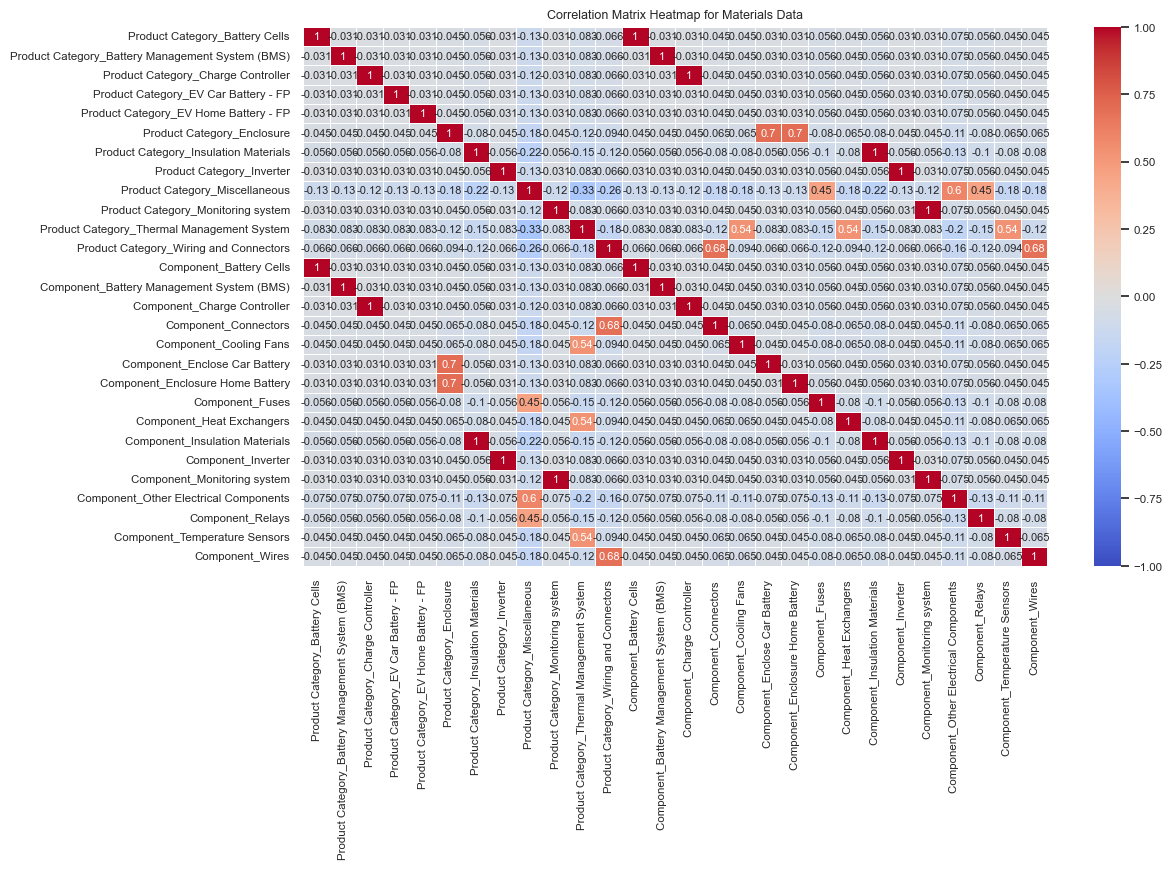

In [36]:
# Perform the correlation analysis and plot the correlation matrix for an simplified version of the 'Materials' dataset

# This analysiscan be helpful for understanding relations between products, their components and materials. Correlation between these catigories is 
# quite obvious, this data can be flexibly aggregated at different levels whem joined with other datasets.

correlations_obj.plot_correlation_matrix( dataframes['Materials'], categorical_cols = ['Product Category', 'Component'], encode_categorical=True,\
                                         ignore_cols=[ 'MaterialDescription', 'MaterialKey', 'MaterialType', 'Material'], plot_title = 'Correlation Matrix Heatmap for Materials Data')

In [37]:
# Summarize the 'Plants' dataset.
dataframe_obj.print_summary(dataframes, 'Plants')

Shape of Plants: (8, 7)
Data Types in Plants:
PlantKey            int64
Plant              object
PlantType          object
PlantName          object
PlantCity          object
PlantPostalCode    object
PlantStreet        object
dtype: object

Number of Unique Values in Each Column:
PlantKey: 8 unique values
Plant: 8 unique values
PlantType: 2 unique values
PlantName: 8 unique values
PlantCity: 5 unique values
PlantPostalCode: 5 unique values
PlantStreet: 5 unique values

Summary Statistics for Numerical Columns in Plants
       PlantKey
count   8.00000
mean    4.50000
std     2.44949
min     1.00000
25%     2.75000
50%     4.50000
75%     6.25000
max     8.00000

First 2 rows of Plants
   PlantKey Plant   PlantType           PlantName PlantCity PlantPostalCode  \
0         1  ANT1  Production  Antwerp Production   Antwerp            2030   
1         2  WRO1  Production  Wrocław Production   Wrocław          54-202   

   PlantStreet  
0  Scheldelaan  
1     Legnicka  


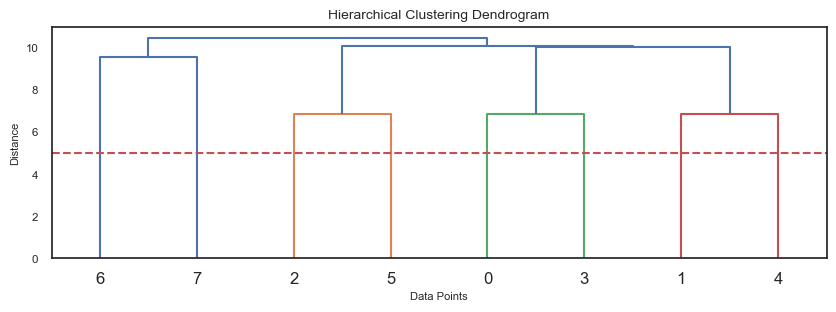

In [38]:
# With 8 plants being included in the dataset, clustering analysis does not seem relevant.
# I will visualize hierarchial clustering results proving the idea that larger clusters do not look feasible with this data:

clusterer_obj.plot_hierarchical_clustering(dataframes['Plants'], figsize=(10, 3), max_d=5, sample_frac=1)

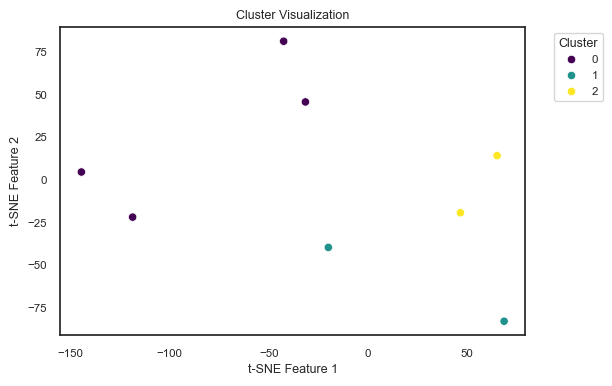

In [39]:
# The hierarchical clustering analysis that indicates that this dataset can be clustered into 8 groups. 
# Other approaches to clustering do not result in the groups being distinctly different from each other:

clusterer_obj.visualize_clusters(dataframes['Plants'], n_clusters=3, figsize=(6, 4), sample_frac=1)

In [40]:
# This small dataset with categorical data does not seem to be a good candidate for dimensionality reduction. 
# Translating the existing categorical features into principal components would take encoding the dataset first and looking for the ways to reduce the 
# number of features to a few, which will be close to the number of the original categorical features.
# I will not perform the Principal Component Analysis (PCA) and check for correlation between features.

In [41]:
# Summarize the 'Purchases' dataset.

dataframe_obj.print_summary(dataframes, 'Purchases')

Shape of Purchases: (20000, 13)
Data Types in Purchases:
PurchaseOrder                 int64
PurchaseOrderCreationDate    object
VendorKey                     int64
PlantKey                      int64
MaterialKey                   int64
MaterialPlantKey              int64
PurchaseOrderQuantity         int64
PlannedGoodsReceiptDate      object
ActualGoodsReceiptDate       object
PlannedArrivalDateYard       object
ActualArrivalDateYard        object
PlannedVendorShipmentDate    object
ActualVendorShipmentDate     object
dtype: object

Number of Unique Values in Each Column:
PurchaseOrder: 20000 unique values
PurchaseOrderCreationDate: 1097 unique values
VendorKey: 3 unique values
PlantKey: 5 unique values
MaterialKey: 2 unique values
MaterialPlantKey: 10 unique values
PurchaseOrderQuantity: 51 unique values
PlannedGoodsReceiptDate: 1096 unique values
ActualGoodsReceiptDate: 1099 unique values
PlannedArrivalDateYard: 1096 unique values
ActualArrivalDateYard: 1105 unique values
PlannedVen

In [42]:
# Ensure data type consistency for datetime columns

dataframes['Purchases']['PurchaseOrderCreationDate'] = pd.to_datetime(dataframes['Purchases']['PurchaseOrderCreationDate'])
dataframes['Purchases']['PlannedVendorShipmentDate'] = pd.to_datetime(dataframes['Purchases']['PlannedVendorShipmentDate'])
dataframes['Purchases']['ActualVendorShipmentDate'] = pd.to_datetime(dataframes['Purchases']['ActualVendorShipmentDate'])
dataframes['Purchases']['PlannedArrivalDateYard'] = pd.to_datetime(dataframes['Purchases']['PlannedArrivalDateYard'])
dataframes['Purchases']['ActualArrivalDateYard'] = pd.to_datetime(dataframes['Purchases']['ActualArrivalDateYard'])
dataframes['Purchases']['PlannedGoodsReceiptDate'] = pd.to_datetime(dataframes['Purchases']['PlannedGoodsReceiptDate'])
dataframes['Purchases']['ActualGoodsReceiptDate'] = pd.to_datetime(dataframes['Purchases']['ActualGoodsReceiptDate'])

# Add a few calculated  new columnsto account for time intervals in the correlations analysis
dataframes['Purchases']['PlannedShipmentToYard'] = (dataframes['Purchases']['PlannedArrivalDateYard'] - dataframes['Purchases']['PlannedVendorShipmentDate']).dt.days
dataframes['Purchases']['ActualShipmentToYard'] = (dataframes['Purchases']['ActualArrivalDateYard'] - dataframes['Purchases']['ActualVendorShipmentDate']).dt.days
dataframes['Purchases']['PlannedYardToReceipt'] = (dataframes['Purchases']['PlannedGoodsReceiptDate'] - dataframes['Purchases']['PlannedArrivalDateYard']).dt.days
dataframes['Purchases']['ActualYardToReceipt'] = (dataframes['Purchases']['ActualGoodsReceiptDate'] - dataframes['Purchases']['ActualArrivalDateYard']).dt.days

# Calculate lead times and their delta
dataframes['Purchases']['PlannedLead'] = dataframes['Purchases']['PlannedShipmentToYard'] + dataframes['Purchases']['PlannedYardToReceipt']
dataframes['Purchases']['ActualLead'] = dataframes['Purchases']['ActualShipmentToYard'] + dataframes['Purchases']['ActualYardToReceipt']
dataframes['Purchases']['DeltaPlannedActual'] = dataframes['Purchases']['PlannedLead'] - dataframes['Purchases']['ActualLead']

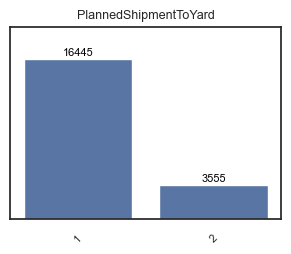

In [43]:
# Analyze the distribution of planned shipment to yard time intervals.

histogram_obj.plot_vertical(dataframes['Purchases'], column = 'PlannedShipmentToYard', title='PlannedShipmentToYard', figsize=(3.5, 2.5))

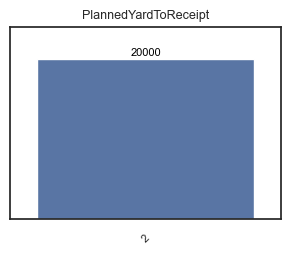

In [44]:
# Analyze the distribution of planned yard to receipt time intervals.

histogram_obj.plot_vertical(dataframes['Purchases'], 'PlannedYardToReceipt', title='PlannedYardToReceipt', figsize=(3.5, 2.5))

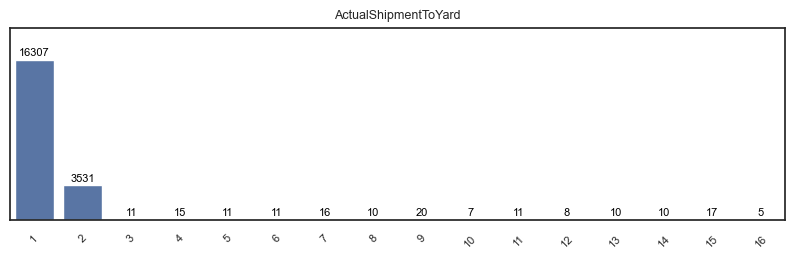

In [45]:
# Analyze the distribution of actual shipment to yard time intervals.

histogram_obj.plot_vertical(dataframes['Purchases'], column = 'ActualShipmentToYard', title='ActualShipmentToYard', figsize=(10, 2.5))

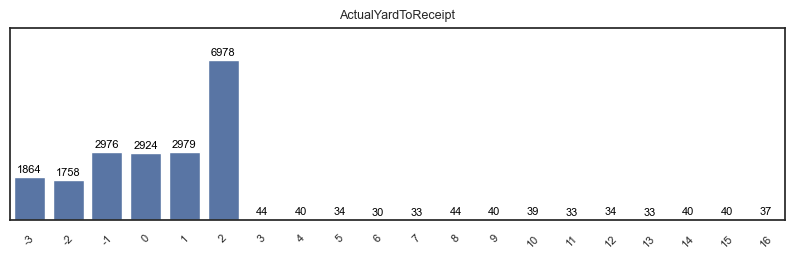

In [46]:
# Analyze the distribution of actual yard to receipt time intervals.

histogram_obj.plot_vertical(dataframes['Purchases'], column = 'ActualYardToReceipt', title='ActualYardToReceipt', figsize=(10, 2.5))

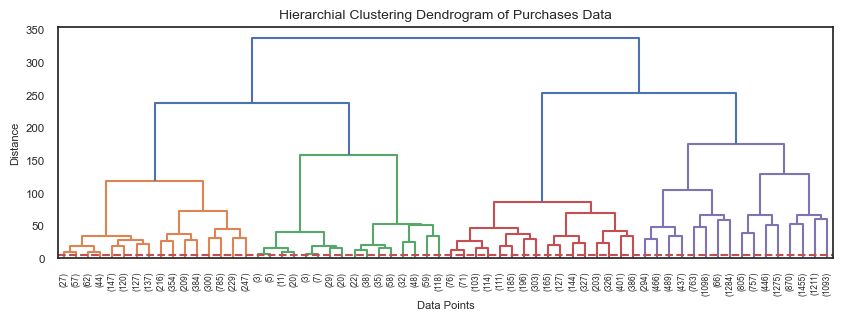

In [47]:
# Analyse clusterization potential of a simplified "Purchases" dataset that does not include datetime columns.

clusterer_obj.plot_hierarchical_clustering(dataframes['Purchases'], figsize=(10, 3), max_d=5, sample_frac=1, title = "Hierarchial Clustering Dendrogram of Purchases Data")

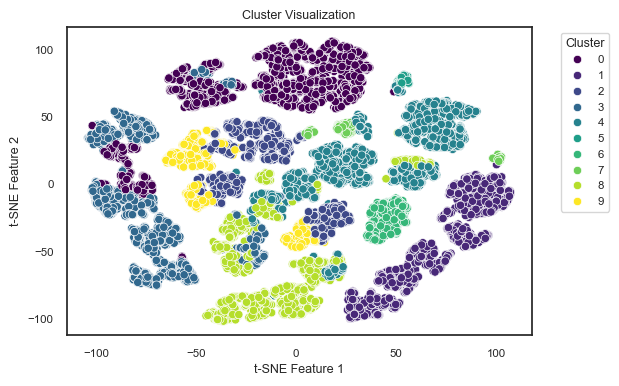

In [48]:
# The hierarchial clustering analysis reveals that the 'Purchases' data could potentially be grouped into several distinct clusters.
# I will try visualising how it can be divided into 10 clusters using a subset of data since the dataset itself is quite large.

clusterer_obj.visualize_clusters(dataframes['Purchases'], n_clusters=10, figsize=(6, 4), sample_frac=0.8)

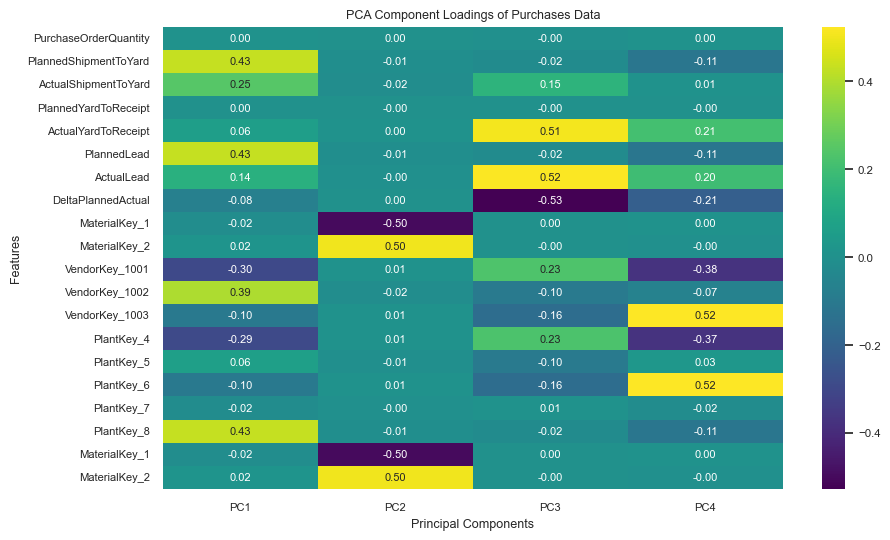

'Explained variance ratio: [0.23647844 0.21052639 0.15685731 0.14912878], Total variance explained by the first 4 components: 0.75 or 75.30%'

In [49]:
# Execute Principal Component Analysis (PCA) on the 'Purchases' dataset with four components, which in total account for 75% of 
# feature variance. 

# Principal Component Analysis (PCA) on 'Purchases' dataset reveals a  correlation between 'PlannedShipmentToYard' and 'PlannedLeadTime', which 
# suggests that shipment schedules could be linked with procurement lead times.
# Additionally, the could be an association between 'VandorKey_1001' and 'PlantKey_4' suggesting special vendor-plant relationships.
# Conversely, 'Purchase Order Quantity' appears to contribute minimally to the dataset's variance, indicating that quantitative aspects of orders 
# play a less significant role in the variability of supply chain operations compared to strategic planning and partnerships. 

pca_obj.perform_pca(data = dataframes['Purchases'], n_components=4, plot_loadings=True,\
                    categorical_cols = ['MaterialKey', 'VendorKey', 'PlantKey', 'MaterialKey'],\
                    ignore_cols = ['PurchaseOrder', 'PurchaseOrderCreationDate', 'MaterialPlantKey',\
                                  'PlannedVendorShipmentDate', 'ActualVendorShipmentDate','PlannedArrivalDateYard', 'ActualArrivalDateYard',\
                                   'PlannedGoodsReceiptDate', 'ActualGoodsReceiptDate'],
                   plot_title = "PCA Component Loadings of Purchases Data")

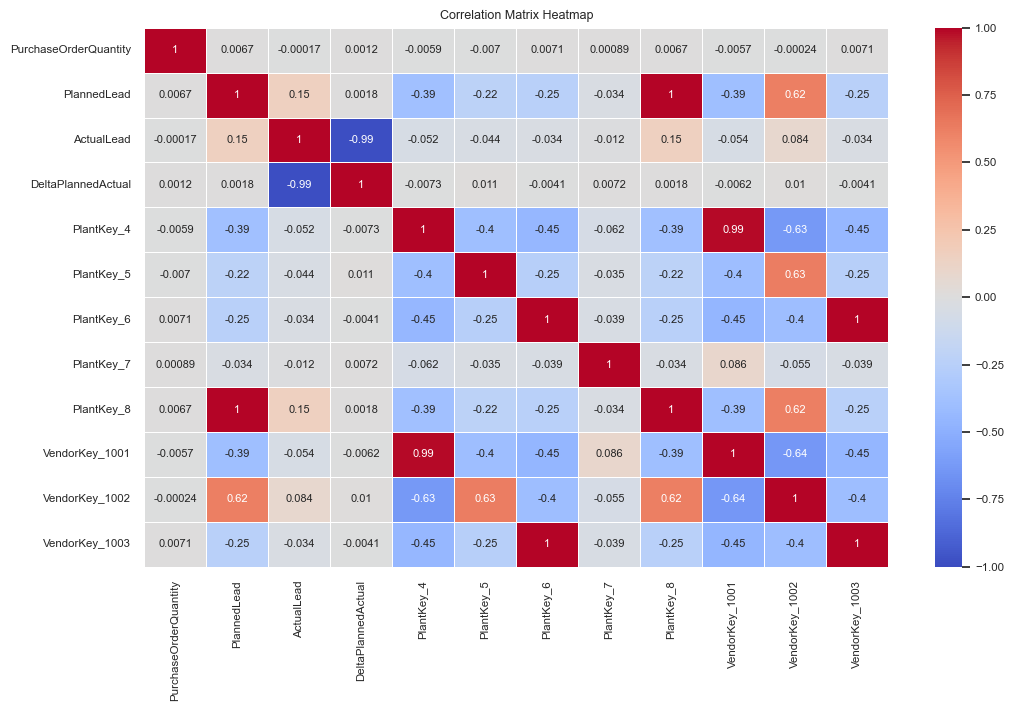

In [50]:
# Perform the correlation analysis and plot the correlation matrix:

correlations_obj.plot_correlation_matrix(dataframes['Purchases'], categorical_cols=['PlantKey','VendorKey'], encode_categorical=True,\
                                         ignore_cols=['MaterialPlantKey', 'MaterialKey', 'PurchaseOrder', 'PurchaseOrderCreationDate', 'PlannedGoodsReceiptDate', 'ActualGoodsReceiptDate',\
                                                     'PlannedArrivalDateYard','ActualShipmentToYard', 'ActualArrivalDateYard', 'PlannedVendorShipmentDate', 'ActualVendorShipmentDate',\
                                                     'PlannedYardToReceipt','ActualYardToReceipt', 'PlannedShipmentToYard'])

# This correlations analysis reveals several key relationships between variables:

# A noticeable correlation between PlannedLead times and VendorKey_1002. This association suggests that the lead times planned for products
# or materials sourced from VendorKey_1002 are distinctively linked, possibly due to specific vendor practices or logistical arrangements.

# A correlation is observed between VendorKey_1001 and PlantKey_4. 
# This relationship indicates a particular connection or dependency between the operations of VendorKey_1001 and the activities at PlantKey_4, 
# potentially reflecting a targeted supply chain strategy or exclusive procurement agreements.

# A strong negative correlation is identified between ActualLead times and the DeltaPlannedActual, 
#highlighting a significant inverse relationship. This suggests that as the difference between planned and actual lead times increases, 
# the actual lead times tend to decrease. 
# This could imply efficiencies gained in execution that were not anticipated in planning or adjustments made to expedite processes 
# beyond initial expectations.

In [51]:
# Summarize the 'Sales' dataset.

dataframe_obj.print_summary(dataframes, 'Sales')

Shape of Sales: (100000, 12)
Data Types in Sales:
SalesOrder                 int64
SalesOrderItem             int64
SalesOrderCreationDate    object
CustomerKey                int64
MaterialKey                int64
OrderQuantity              int64
PlantKey                   int64
MaterialPlantKey           int64
SalesDocType              object
RequestedDeliveryDate     object
DeliveryDate              object
HighOrderQtyFlag           int64
dtype: object

Number of Unique Values in Each Column:
SalesOrder: 100000 unique values
SalesOrderItem: 1 unique values
SalesOrderCreationDate: 1096 unique values
CustomerKey: 1227 unique values
MaterialKey: 2 unique values
OrderQuantity: 26 unique values
PlantKey: 5 unique values
MaterialPlantKey: 10 unique values
SalesDocType: 2 unique values
RequestedDeliveryDate: 838 unique values
DeliveryDate: 1137 unique values
HighOrderQtyFlag: 2 unique values

Summary Statistics for Numerical Columns in Sales
         SalesOrder  SalesOrderItem    CustomerK

In [52]:
# Enforce data type consistency for datetime columns and add a few calculated  new columnsto account for time intervals in the correlations analysis. 

dataframes['Sales']['RequestedDeliveryDate']  =  pd.to_datetime(dataframes['Sales']['RequestedDeliveryDate'])
dataframes['Sales']['DeliveryDate']  =  pd.to_datetime(dataframes['Sales']['DeliveryDate'])
dataframes['Sales']['deltaRequestedActualDelivery'] =  (dataframes['Sales']['DeliveryDate'] - dataframes['Sales']['RequestedDeliveryDate']).dt.days

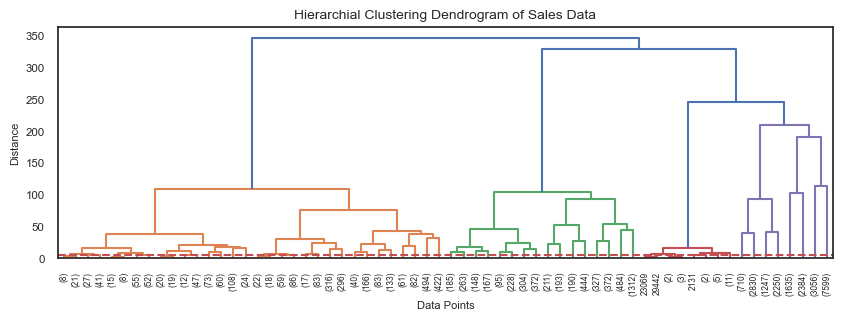

In [53]:
# Analyse clusterization potential of a simplified "Sales" dataset that does not include datetime columns.

sales = dataframes['Sales'].drop(['RequestedDeliveryDate', 'DeliveryDate', 'SalesOrderCreationDate', 'SalesOrder'], axis=1)
clusterer_obj.plot_hierarchical_clustering(sales, figsize=(10, 3), max_d=5 , sample_frac=0.3, title = "Hierarchial Clustering Dendrogram of Sales Data")

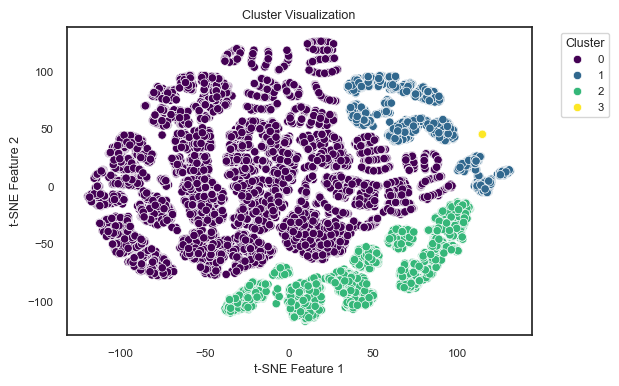

In [60]:
# The hierarchial clustering analysis reveals a a potential for 'Sales' data to be group into a few clusters with distinct characteristics.
# I will try setting up four clusters on a subset of the 'Sales' data.

clusterer_obj.visualize_clusters(sales, n_clusters=4, figsize=(6, 4), sample_frac=0.25)

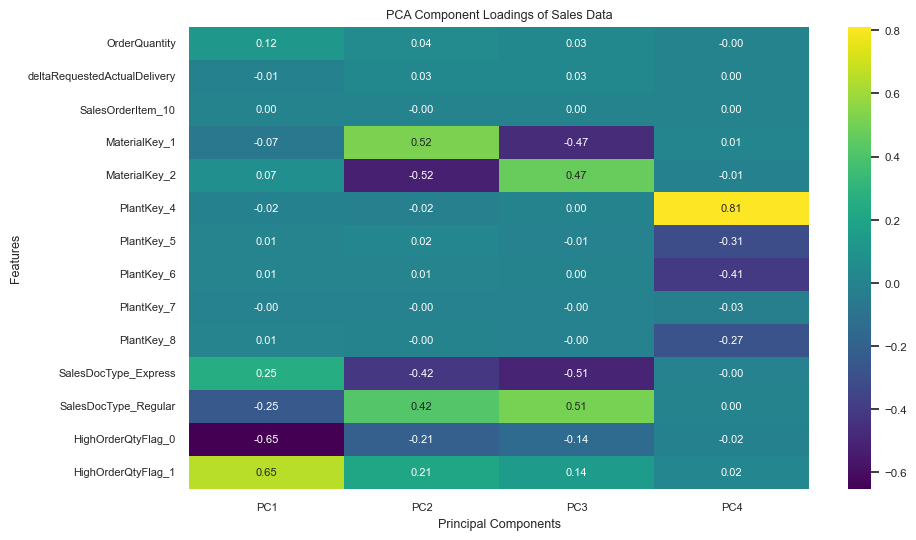

'Explained variance ratio: [0.15547964 0.15403676 0.15364192 0.11624782], Total variance explained by the first 4 components: 0.58 or 57.94%'

In [55]:
# I will try executing  Principal Component Analysis (PCA) on the 'Sales' dataset.
# This does not seem to be a very meaningful actity though since most of its features are either of datetime type or categorical.
# With this analysis I am not so interested in feature reduction potential, but rather the correlation between familiar 
# features such as 'PlantKey' and 'MaterialKey' as such 'Sales'-specific features as 'HighOrderQtyFlag' and 'SalesDocType'

# Conclusion: the PCA analysis shows negative correlation between encoded features, insignificant correlation of 'OrderQuantity' feature with 
# the most significant principal components.

pca_obj.perform_pca(data = sales, n_components=4, plot_loadings=True,\
                    categorical_cols = ['SalesOrderItem', 'MaterialKey', 'PlantKey', 'SalesDocType', 'HighOrderQtyFlag'],\
                    ignore_cols = ['SalesOrder', 'SalesOrderCreationDate', 'CustomerKey', 'MaterialPlantKey','RequestedDeliveryDate', 'DeliveryDate'],
                   plot_title = "PCA Component Loadings of Sales Data")

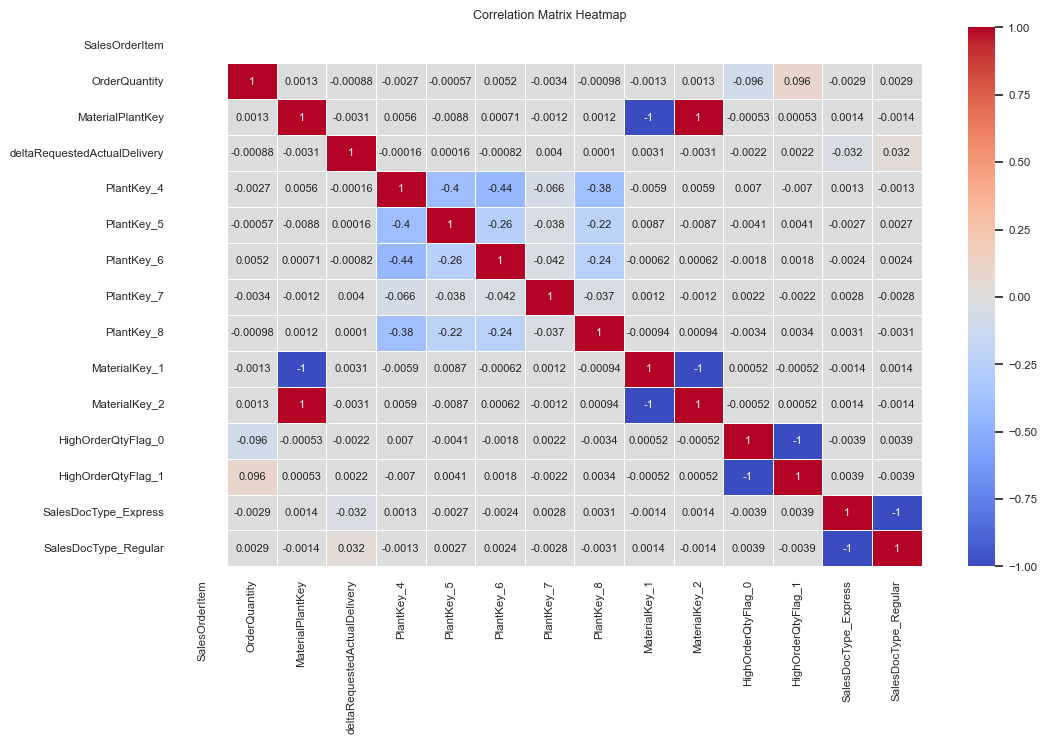

In [56]:
# Perform the correlation analysis and plot the correlation matrix:
correlations_obj.plot_correlation_matrix(dataframes['Sales'], categorical_cols=['PlantKey','MaterialKey', 'HighOrderQtyFlag', 'SalesDocType'], encode_categorical=True,\
                                         ignore_cols=['SalesOrder', 'CustomerKey', 'RequestedDeliveryDate', 'DeliveryDate', 'SalesOrderCreationDate'])
# This correlations analysis reveals several key relationships between variables:

# A noticeable correlation between PlannedLead times and VendorKey_1002. This association suggests that the lead times planned for products
# or materials sourced from VendorKey_1002 are distinctively linked, possibly due to specific vendor practices or logistical arrangements.

# A correlation is observed between VendorKey_1001 and PlantKey_4. 
# This relationship indicates a particular connection or dependency between the operations of VendorKey_1001 and the activities at PlantKey_4, 
# potentially reflecting a targeted supply chain strategy or exclusive procurement agreements.

# A strong negative correlation is identified between ActualLead times and the DeltaPlannedActual, 
#highlighting a significant inverse relationship. This suggests that as the difference between planned and actual lead times increases, 
# the actual lead times tend to decrease. 
# This could imply efficiencies gained in execution that were not anticipated in planning or adjustments made to expedite processes 
# beyond initial expectations.

In [57]:
# I will try checking 'Sales' and 'Purchases' datasets for seasonal pattern.
# Prepare data for a polar plot visualization.

dataframes['Sales']['RequestedDeliveryDate'] = pd.to_datetime(dataframes['Sales']['RequestedDeliveryDate'])
dataframes['Sales']['Year'] = dataframes['Sales']['RequestedDeliveryDate'].dt.year
dataframes['Sales']['Month'] = dataframes['Sales']['RequestedDeliveryDate'].dt.month

dataframes['Purchases']['PlannedGoodsReceiptDate'] = pd.to_datetime(dataframes['Purchases']['PlannedGoodsReceiptDate'])
dataframes['Purchases']['Year'] = dataframes['Purchases']['PlannedGoodsReceiptDate'].dt.year
dataframes['Purchases']['Month'] = dataframes['Purchases']['PlannedGoodsReceiptDate'].dt.month

monthly_sales = dataframes['Sales'].groupby(['Year', 'Month'])['OrderQuantity'].sum().unstack(0)
monthly_purchases = dataframes['Purchases'].groupby(['Year', 'Month'])['PurchaseOrderQuantity'].sum().unstack(0)

# Extract unique years from both Sales and Purchases datasets
unique_years_sales = dataframes['Sales']['Year'].unique()
unique_years_purchases = dataframes['Purchases']['Year'].unique()

# Combine the unique years from both datasets
all_unique_years = np.union1d(unique_years_sales, unique_years_purchases)

# Sort the years to ensure chronological order
years = np.sort(all_unique_years)

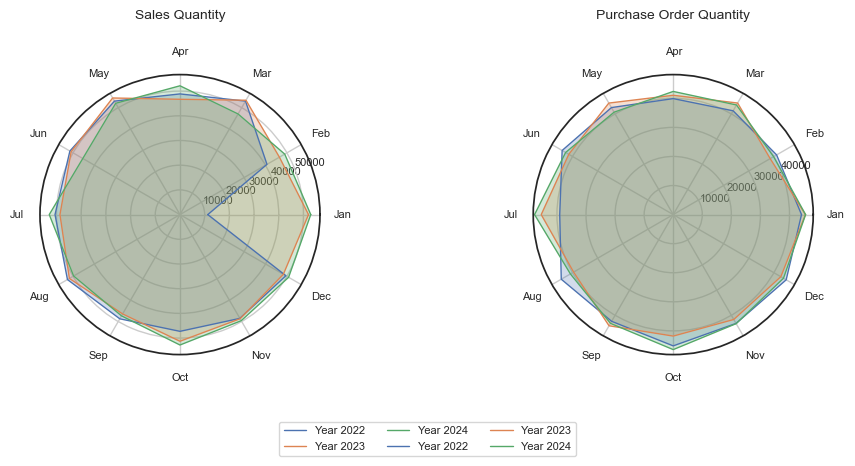

In [58]:
# Provide polar plot visualizations of 'Sales' and 'Purchase' data across different periods.

# Conclusion: 
# The visualizations spans the years covered by data in both datasets, namely 2022-2024. Unlike 'Inventory' data above, neither sales nor purchases 
# seem to have a distinct seasonal pattern.

histogram_obj.polar_plot(df1 = dataframes['Sales'], df1_quantity_column = 'OrderQuantity',\
                         df2 =  dataframes['Purchases'], df2_quantity_column = 'PurchaseOrderQuantity',\
                         plot1_title="Sales Quantity", plot2_title="Purchase Order Quantity")

In [59]:
# Summarize the 'Vendors' dataset. 

dataframe_obj.print_summary(dataframes, 'Vendors')

Shape of Vendors: (9, 7)
Data Types in Vendors:
VendorKey            int64
VendorTier          object
VendorName          object
VendorCountry       object
VendorCity          object
VendorPostalCode    object
VendorStreet        object
dtype: object

Number of Unique Values in Each Column:
VendorKey: 9 unique values
VendorTier: 2 unique values
VendorName: 9 unique values
VendorCountry: 7 unique values
VendorCity: 9 unique values
VendorPostalCode: 6 unique values
VendorStreet: 9 unique values

Summary Statistics for Numerical Columns in Vendors
         VendorKey
count     9.000000
mean    336.333333
std     499.252441
min       1.000000
25%       3.000000
50%       5.000000
75%    1001.000000
max    1003.000000

First 2 rows of Vendors
   VendorKey VendorTier          VendorName VendorCountry VendorCity  \
0       1001         T0  Antwerp Production       Belgium    Antwerp   
1       1002         T0  Wrocław Production        Poland    Wrocław   

  VendorPostalCode VendorStreet  
0 

In [ ]:
# For this small table comprised of categorical variables I will not perform clusterization, PCA or correlation analysis 
# since they do not seem to be of relevance.